In [131]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# স্টক লিস্ট (5টি জনপ্রিয় স্টক)
stocks = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']
start_date = "2020-01-01"
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')

# ডেটা ডাউনলোড
data = yf.download(stocks, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
print("প্রথম ৫ সারি:")
print(data.head())
print("\nশেষ ৫ সারি:")
print(data.tail())





[*********************100%***********************]  5 of 5 completed

প্রথম ৫ সারি:
Ticker           AAPL       AMZN      GOOGL        MSFT       TSLA
Date                                                              
2020-01-02  72.620834  94.900497  68.026024  153.042297  28.684000
2020-01-03  71.914818  93.748497  67.670151  151.136627  29.534000
2020-01-06  72.487846  95.143997  69.473839  151.527298  30.102667
2020-01-07  72.146957  95.343002  69.339645  150.145737  31.270666
2020-01-08  73.307510  94.598503  69.833183  152.537292  32.809334

শেষ ৫ সারি:
Ticker            AAPL        AMZN       GOOGL        MSFT        TSLA
Date                                                                  
2025-07-28  214.050003  232.789993  192.580002  512.500000  325.589996
2025-07-29  211.270004  231.009995  195.750000  512.570007  321.200012
2025-07-30  209.050003  230.190002  196.529999  513.239990  319.040009
2025-07-31  207.570007  234.110001  191.899994  533.500000  308.269989
2025-08-01  202.380005  214.750000  189.130005  524.109985  302.630005


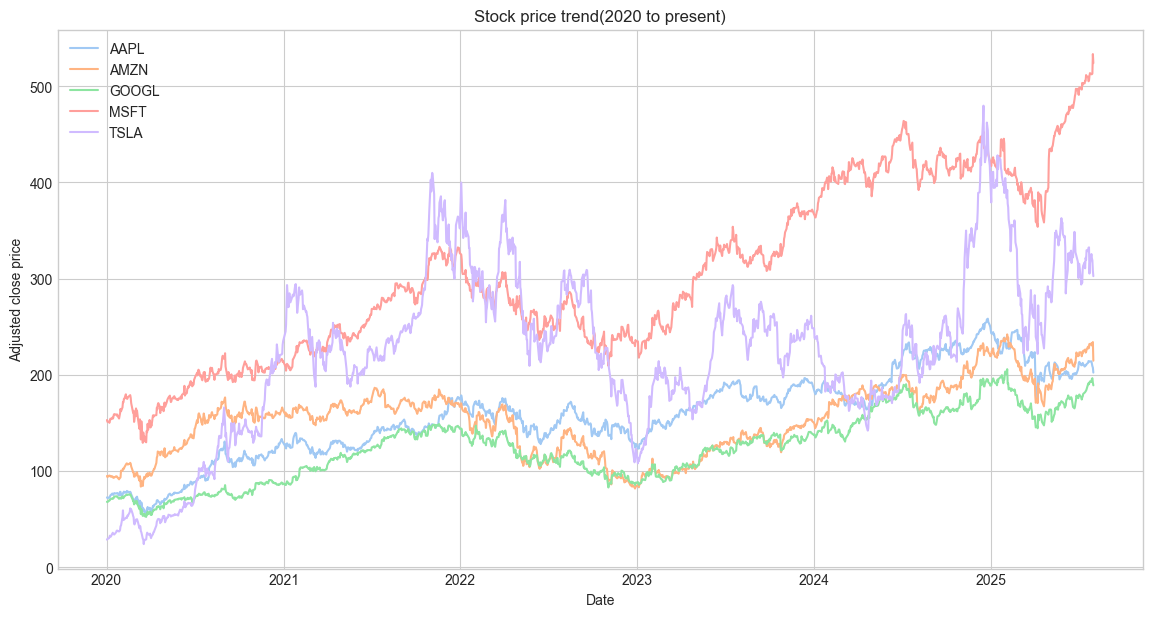

In [132]:
plt.figure(figsize=(14, 7))
for col in data.columns:
    plt.plot(data.index, data[col], label=col)
plt.title("Stock price trend(2020 to present)")
plt.xlabel("Date")
plt.ylabel("Adjusted close price")
plt.legend()
plt.grid(True)
plt.show()

In [133]:
# দৈনিক রিটার্ন গণনা
returns = data.pct_change().dropna()

print("\nদৈনিক রিটার্নের প্রথম ৫ সারি:")
print(returns.head())

# বার্ষিক রিটার্ন ও কোভেরিয়েন্স ম্যাট্রিক্স
mu = returns.mean() * 252  # বার্ষিক গড় রিটার্ন (252 ট্রেডিং দিন)
cov_matrix = returns.cov() * 252   # বার্ষিক কোভেরিয়েন্স ম্যাট্রিক্স
print("\nবার্ষিক গড় রিটার্ন (mu):")
print(mu)
print("\nবার্ষিক কোভেরিয়েন্স ম্যাট্রিক্স (Sigma):")
print(cov_matrix)


দৈনিক রিটার্নের প্রথম ৫ সারি:
Ticker          AAPL      AMZN     GOOGL      MSFT      TSLA
Date                                                        
2020-01-03 -0.009722 -0.012139 -0.005231 -0.012452  0.029633
2020-01-06  0.007968  0.014886  0.026654  0.002585  0.019255
2020-01-07 -0.004703  0.002092 -0.001932 -0.009118  0.038801
2020-01-08  0.016086 -0.007809  0.007118  0.015928  0.049205
2020-01-09  0.021241  0.004799  0.010498  0.012493 -0.021945

বার্ষিক গড় রিটার্ন (mu):
Ticker
AAPL     0.236610
AMZN     0.211882
GOOGL    0.237138
MSFT     0.267055
TSLA     0.653247
dtype: float64

বার্ষিক কোভেরিয়েন্স ম্যাট্রিক্স (Sigma):
Ticker      AAPL      AMZN     GOOGL      MSFT      TSLA
Ticker                                                  
AAPL    0.105026  0.070314  0.067220  0.071299  0.109493
AMZN    0.070314  0.130289  0.076680  0.074463  0.110299
GOOGL   0.067220  0.076680  0.106505  0.071737  0.093433
MSFT    0.071299  0.074463  0.071737  0.091506  0.093058
TSLA    0.109493  0.

In [134]:
n_assets = len(stocks)
equal_weights = np.ones(n_assets) / n_assets  # All weights = 20%
print("\nEqual Weights:")
for stock, weight in zip(stocks, equal_weights):
    print(f"{stock}: {weight:.4f} or {weight*100:.2f}%")

# Calculate and print the risk
equal_risk = np.sqrt(equal_weights @ cov_matrix @ equal_weights)
print(f"\nEqual Portfolio Risk: {equal_risk:.4f} or {equal_risk*100:.2f}% & Return: {np.sum(equal_weights * mu):.4f} or {np.sum(equal_weights * mu)*100:.2f}%")







Equal Weights:
AAPL: 0.2000 or 20.00%
GOOGL: 0.2000 or 20.00%
MSFT: 0.2000 or 20.00%
AMZN: 0.2000 or 20.00%
TSLA: 0.2000 or 20.00%

Equal Portfolio Risk: 0.3207 or 32.07% & Return: 0.3212 or 32.12%


In [135]:
def optimize_portfolio_newton(cov_matrix, max_iter=100, tol=1e-6):
    n = cov_matrix.shape[0]
    w0 = np.ones(n) / n  # Start with equal weights
    lambda0 = 0
    x0 = np.hstack([w0, lambda0])
    
    for _ in range(max_iter):
        w = x0[:-1]
        lam = x0[-1]
        
        # Gradient
        grad_w = 2 * cov_matrix @ w - lam * np.ones(n)
        grad_lam = 1 - np.sum(w)
        grad = np.hstack([grad_w, grad_lam])
        
        # Hessian
        H = np.vstack([
            np.hstack([2 * cov_matrix, -np.ones(n).reshape(-1, 1)]),
            np.hstack([-np.ones(n), 0])
        ])
        
        # Newton step
        delta_x = np.linalg.solve(H, -grad)
        x0 += delta_x
        
        if np.linalg.norm(delta_x) < tol:
            break
    
    weights = x0[:-1] / np.sum(x0[:-1])  # Normalize
    return weights

optimal_weights = optimize_portfolio_newton(cov_matrix.values)
optimal_risk = np.sqrt(optimal_weights @ cov_matrix @ optimal_weights)
print("\nOptimal Weight:")
for stock, weight in zip(stocks, optimal_weights):
 print(f"{stock}: {weight:.4f} or {weight*100:.2f}%")

print(f"\nOptimized Portfolio Risk: {optimal_risk*100:.2f}% & Return: {np.sum(optimal_weights * mu)*100:.2f}%")

print("\n--- Comparison ---")
print(f"Equal-Weighted Risk: {equal_risk:.4f}")
print(f"Optimized Risk: {optimal_risk:.4f}")
print(f"Risk Reduction: {((equal_risk - optimal_risk) / equal_risk * 100):.2f}%")




Optimal Weight:
AAPL: 0.3076 or 30.76%
GOOGL: 0.1194 or 11.94%
MSFT: 0.2479 or 24.79%
AMZN: 0.3848 or 38.48%
TSLA: -0.0598 or -5.98%

Optimized Portfolio Risk: 27.98% & Return: 22.06%

--- Comparison ---
Equal-Weighted Risk: 0.3207
Optimized Risk: 0.2798
Risk Reduction: 12.76%


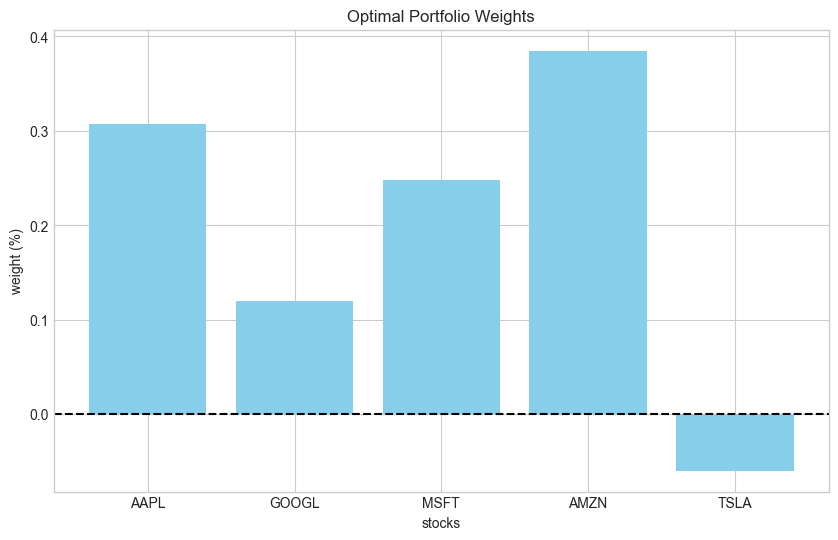

In [136]:
plt.figure(figsize=(10, 6))
plt.bar(stocks, optimal_weights, color='skyblue')
plt.title("Optimal Portfolio Weights")
plt.xlabel("stocks")
plt.ylabel("weight (%)")

plt.axhline(0, color='k', linestyle='--')  # শর্ট সেলিং লাইন
plt.show()

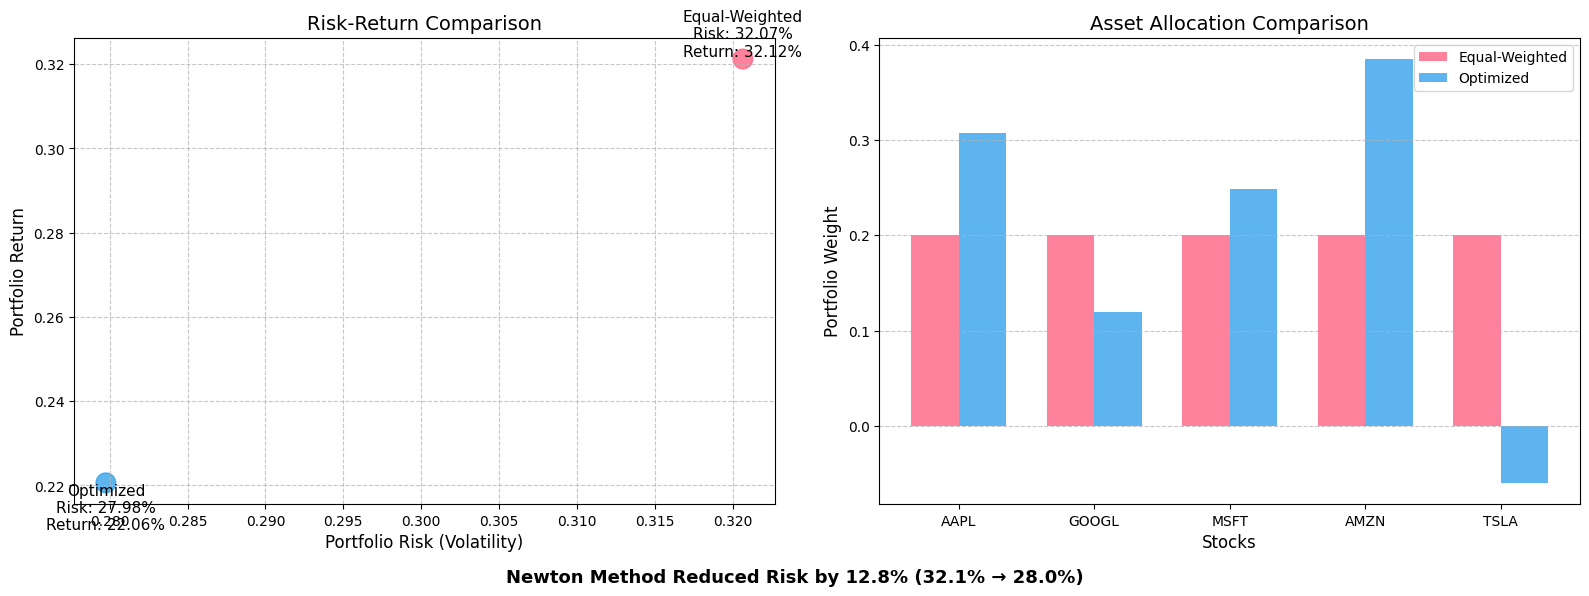

In [112]:
import matplotlib.pyplot as plt

# 1. Prepare data for plotting
labels = ['Equal-Weighted', 'Optimized']
risks = [equal_risk, optimal_risk]
returns = [np.sum(equal_weights * mu), np.sum(optimal_weights * mu)]
colors = ['#FF6384', '#36A2EB']  # Professional color scheme

# 2. Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 3. Risk-Return Scatter Plot
ax1.scatter(risks, returns, c=colors, s=200, alpha=0.8)
ax1.set_xlabel('Portfolio Risk (Volatility)', fontsize=12)
ax1.set_ylabel('Portfolio Return', fontsize=12)
ax1.set_title('Risk-Return Comparison', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.7)

# Add data labels
for i, (risk, ret) in enumerate(zip(risks, returns)):
    ax1.text(risk, ret, 
             f"{labels[i]}\nRisk: {risk*100:.2f}%\nReturn: {ret*100:.2f}%", 
             fontsize=11, ha='center', va='bottom' if i==0 else 'top')

# 4. Weights Comparison Bar Chart
bar_width = 0.35
x = np.arange(len(stocks))

ax2.bar(x - bar_width/2, equal_weights, bar_width, 
        label='Equal-Weighted', color=colors[0], alpha=0.8)
ax2.bar(x + bar_width/2, optimal_weights, bar_width, 
        label='Optimized', color=colors[1], alpha=0.8)

ax2.set_xlabel('Stocks', fontsize=12)
ax2.set_ylabel('Portfolio Weight', fontsize=12)
ax2.set_title('Asset Allocation Comparison', fontsize=14)
ax2.set_xticks(x)
ax2.set_xticklabels(stocks)
ax2.legend()
ax2.grid(True, axis='y', linestyle='--', alpha=0.7)

# 5. Add risk reduction annotation
risk_reduction = (equal_risk - optimal_risk)/equal_risk*100
fig.text(0.5, 0.02, 
         f"Newton Method Reduced Risk by {risk_reduction:.1f}% "
         f"({equal_risk*100:.1f}% → {optimal_risk*100:.1f}%)",
         ha='center', fontsize=13, weight='bold')

# 6. Format and save
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.savefig('portfolio_optimization_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

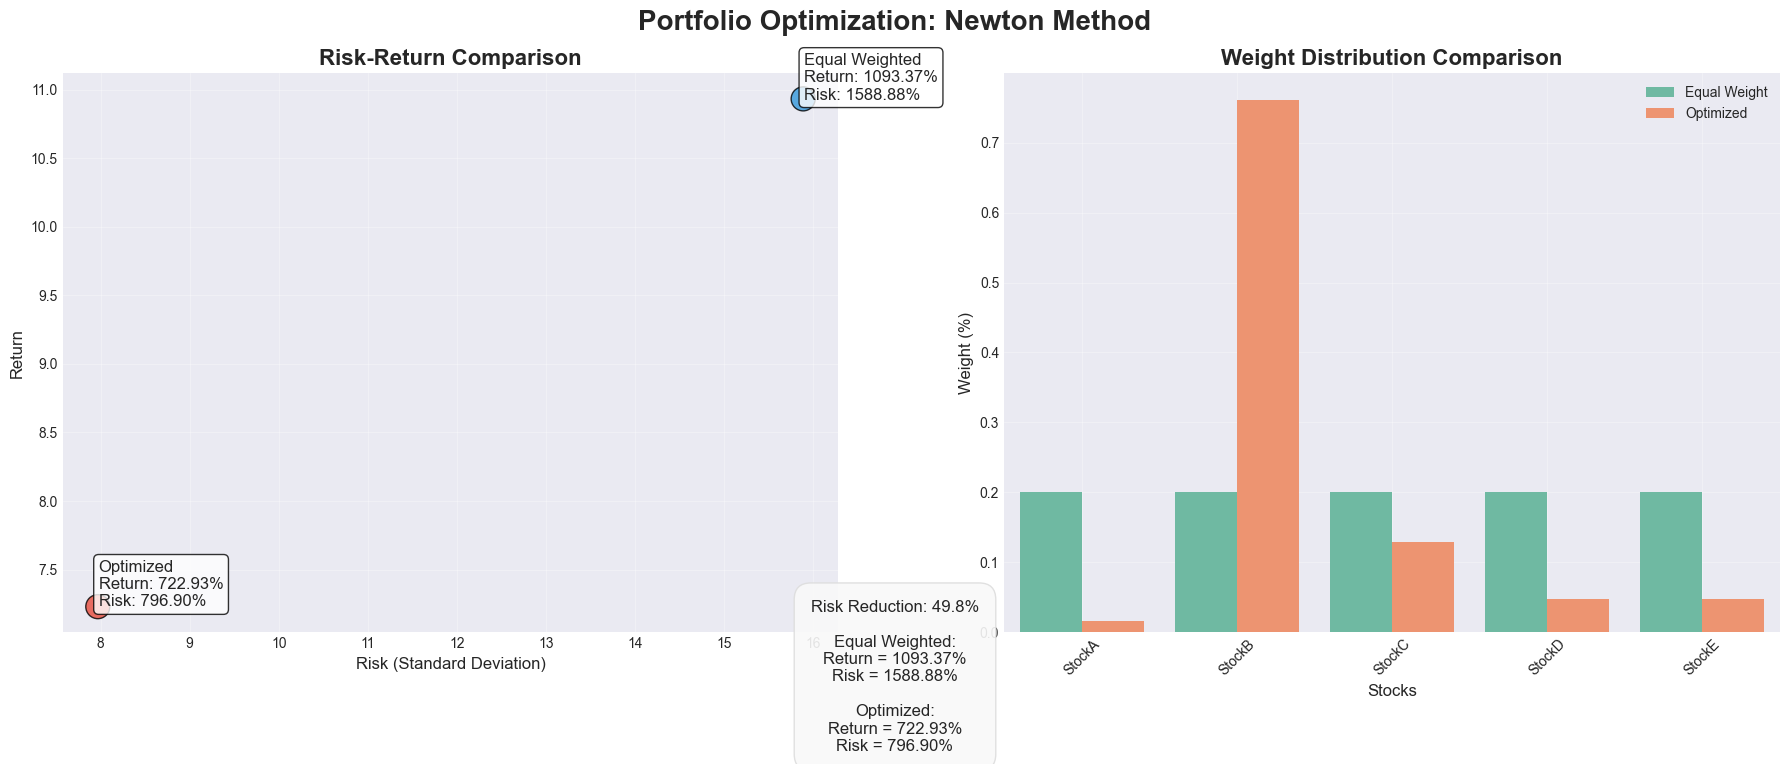

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Style setup
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette('Set2')

# Previous code (if data is not loaded)
# data = pd.read_csv('your_data.csv', index_col=0, parse_dates=True)

# Return calculation
returns = data.pct_change().dropna()

# Annual return and covariance
mu = returns.mean() * 252
cov_matrix = returns.cov() * 252

# Equal-weighted portfolio
stocks = returns.columns.tolist()
n_assets = len(stocks)
equal_weights = np.ones(n_assets) / n_assets
equal_return = np.sum(equal_weights * mu)
equal_risk = np.sqrt(equal_weights @ cov_matrix @ equal_weights)

# Optimized portfolio (Newton method)
def optimize_portfolio_newton(cov_matrix, max_iter=100, tol=1e-6):
    n = cov_matrix.shape[0]
    w0 = np.ones(n) / n
    lambda0 = 0
    x0 = np.hstack([w0, lambda0])
    
    for _ in range(max_iter):
        w = x0[:-1]
        lam = x0[-1]
        
        # Gradient
        grad_w = 2 * cov_matrix @ w - lam * np.ones(n)
        grad_lam = 1 - np.sum(w)
        grad = np.hstack([grad_w, grad_lam])
        
        # Hessian
        H = np.vstack([
            np.hstack([2 * cov_matrix, -np.ones(n).reshape(-1, 1)]),
            np.hstack([-np.ones(n), 0])
        ])
        
        # Newton step
        delta_x = np.linalg.solve(H, -grad)
        x0 += delta_x
        
        if np.linalg.norm(delta_x) < tol:
            break
    
    weights = x0[:-1] / np.sum(x0[:-1])
    return weights

optimal_weights = optimize_portfolio_newton(cov_matrix.values)
optimal_return = np.sum(optimal_weights * mu)
optimal_risk = np.sqrt(optimal_weights @ cov_matrix @ optimal_weights)

# =========================
# Graphical Representation
# =========================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Portfolio comparison graph
portfolios = ['Equal Weighted', 'Optimized']
returns = [equal_return, optimal_return]
risks = [equal_risk, optimal_risk]
colors = ['#3498db', '#e74c3c']

ax1.scatter(risks, returns, s=300, c=colors, alpha=0.8, edgecolor='k')
ax1.set_title('Risk-Return Comparison', fontsize=16, fontweight='bold')
ax1.set_xlabel('Risk (Standard Deviation)', fontsize=12)
ax1.set_ylabel('Return', fontsize=12)
ax1.grid(True, alpha=0.3)

# Annotation
for i, (risk, ret, name) in enumerate(zip(risks, returns, portfolios)):
    ax1.annotate(
        f'{name}\nReturn: {ret*100:.2f}%\nRisk: {risk*100:.2f}%',
        (risk, ret),
        xytext=(risk + 0.01, ret - 0.005 if i==0 else ret + 0.002),
        fontsize=12,
        bbox=dict(boxstyle="round,pad=0.3", fc='white', alpha=0.8)
    )

# Weight distribution graph
weights_data = {
    'Stock': stocks,
    'Equal Weight': equal_weights,
    'Optimized': optimal_weights
}
weights_df = pd.DataFrame(weights_data).melt(id_vars='Stock', var_name='Portfolio', value_name='Weight')

sns.barplot(
    data=weights_df,
    x='Stock',
    y='Weight',
    hue='Portfolio',
    ax=ax2,
    saturation=0.8
)
ax2.set_title('Weight Distribution Comparison', fontsize=16, fontweight='bold')
ax2.set_xlabel('Stocks', fontsize=12)
ax2.set_ylabel('Weight (%)', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

# Risk reduction infobox
risk_reduction = ((equal_risk - optimal_risk) / equal_risk) * 100
info_text = f'Risk Reduction: {risk_reduction:.1f}%\n\n' \
            f'Equal Weighted:\n' \
            f'Return = {equal_return*100:.2f}%\n' \
            f'Risk = {equal_risk*100:.2f}%\n\n' \
            f'Optimized:\n' \
            f'Return = {optimal_return*100:.2f}%\n' \
            f'Risk = {optimal_risk*100:.2f}%'

fig.text(
    0.5, 0.05, info_text,
    ha='center', va='bottom',
    fontsize=12,
    bbox=dict(boxstyle="round,pad=1", fc='#f9f9f9', ec='#ddd', alpha=0.9)
)

plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.suptitle('Portfolio Optimization: Newton Method', fontsize=20, fontweight='bold', y=0.98)
plt.savefig('portfolio_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

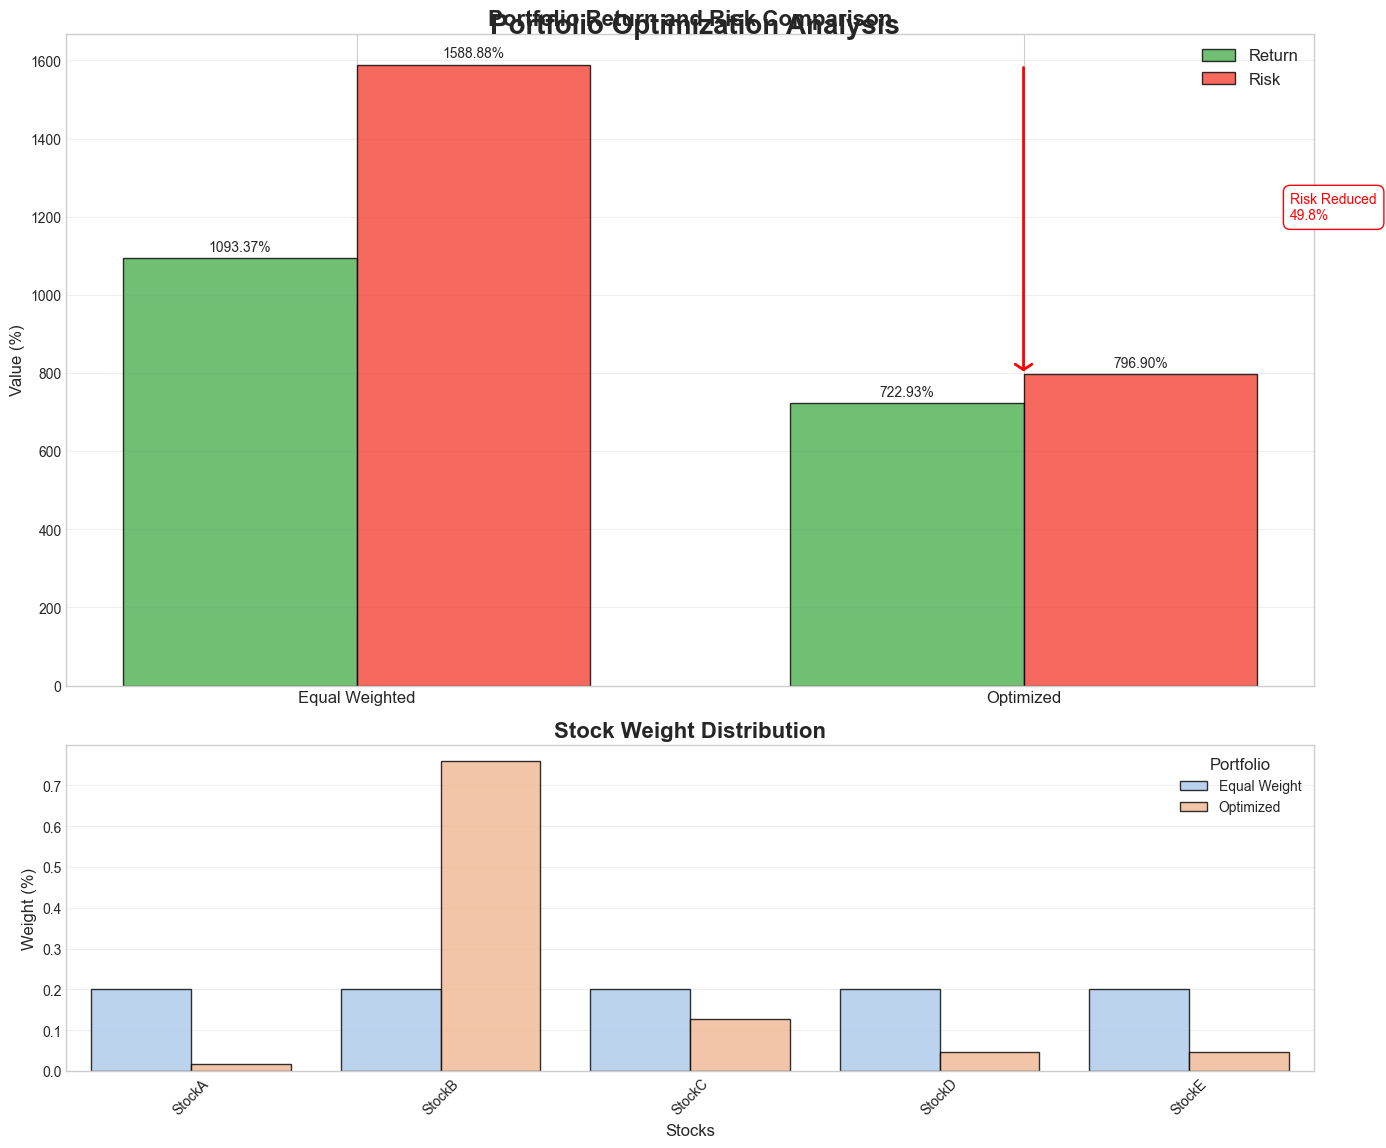

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Style setup
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['figure.figsize'] = (14, 8)
sns.set_palette('pastel')

# Data from previous code (if not already loaded)
# returns = data.pct_change().dropna()
# mu = returns.mean() * 252
# cov_matrix = returns.cov() * 252

# Equal-weighted portfolio
equal_weights = np.ones(len(stocks)) / len(stocks)
equal_return = np.sum(equal_weights * mu)
equal_risk = np.sqrt(equal_weights @ cov_matrix @ equal_weights)

# Optimized portfolio (using your Newton method function)
optimal_weights = optimize_portfolio_newton(cov_matrix.values)
optimal_return = np.sum(optimal_weights * mu)
optimal_risk = np.sqrt(optimal_weights @ cov_matrix @ optimal_weights)

# ===================================
# New graphical representation
# ===================================
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12), gridspec_kw={'height_ratios': [2, 1]})

# 1. Return and risk bar plot (top panel)
portfolios = ['Equal Weighted', 'Optimized']
metrics = ['Return (%)', 'Risk (%)']
values = {
    'Return (%)': [equal_return*100, optimal_return*100],
    'Risk (%)': [equal_risk*100, optimal_risk*100]
}

x = np.arange(len(portfolios))
width = 0.35

# Return bars
rects1 = ax1.bar(x - width/2, values['Return (%)'], width, label='Return', color='#4CAF50', edgecolor='k', alpha=0.8)
# Risk bars
rects2 = ax1.bar(x + width/2, values['Risk (%)'], width, label='Risk', color='#F44336', edgecolor='k', alpha=0.8)

# Risk reduction arrow
ax1.annotate('',
             xy=(1, optimal_risk*100), 
             xytext=(1, equal_risk*100),
             arrowprops=dict(arrowstyle='->,head_width=0.6', color='red', lw=2),
             va='center')

ax1.annotate(f'Risk Reduced\n{((equal_risk - optimal_risk)/equal_risk*100):.1f}%',
             xy=(1, (equal_risk*100 + optimal_risk*100)/2), 
             xytext=(1.4, (equal_risk*100 + optimal_risk*100)/2),
             bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='red'),
             color='red')

ax1.set_ylabel('Value (%)', fontsize=12)
ax1.set_title('Portfolio Return and Risk Comparison', fontsize=16, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(portfolios, fontsize=12)
ax1.legend(fontsize=12)
ax1.grid(True, axis='y', alpha=0.3)

# Add value labels on bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax1.annotate(f'{height:.2f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

autolabel(rects1)
autolabel(rects2)

# 2. Weight distribution (bottom panel)
weights_data = {
    'Stock': stocks,
    'Equal Weight': equal_weights,
    'Optimized': optimal_weights
}
weights_df = pd.DataFrame(weights_data).melt(id_vars='Stock', var_name='Portfolio', value_name='Weight')

sns.barplot(
    data=weights_df, 
    x='Stock', 
    y='Weight', 
    hue='Portfolio',
    ax=ax2,
    alpha=0.8,
    edgecolor='k'
)

ax2.set_title('Stock Weight Distribution', fontsize=16, fontweight='bold')
ax2.set_xlabel('Stocks', fontsize=12)
ax2.set_ylabel('Weight (%)', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.legend(title='Portfolio', fontsize=10, title_fontsize=12)
ax2.grid(True, axis='y', alpha=0.3)

# Overall title
plt.suptitle('Portfolio Optimization Analysis', fontsize=20, fontweight='bold', y=0.95)
plt.tight_layout()
plt.savefig('portfolio_analysis_improved.png', dpi=300, bbox_inches='tight')
plt.show()


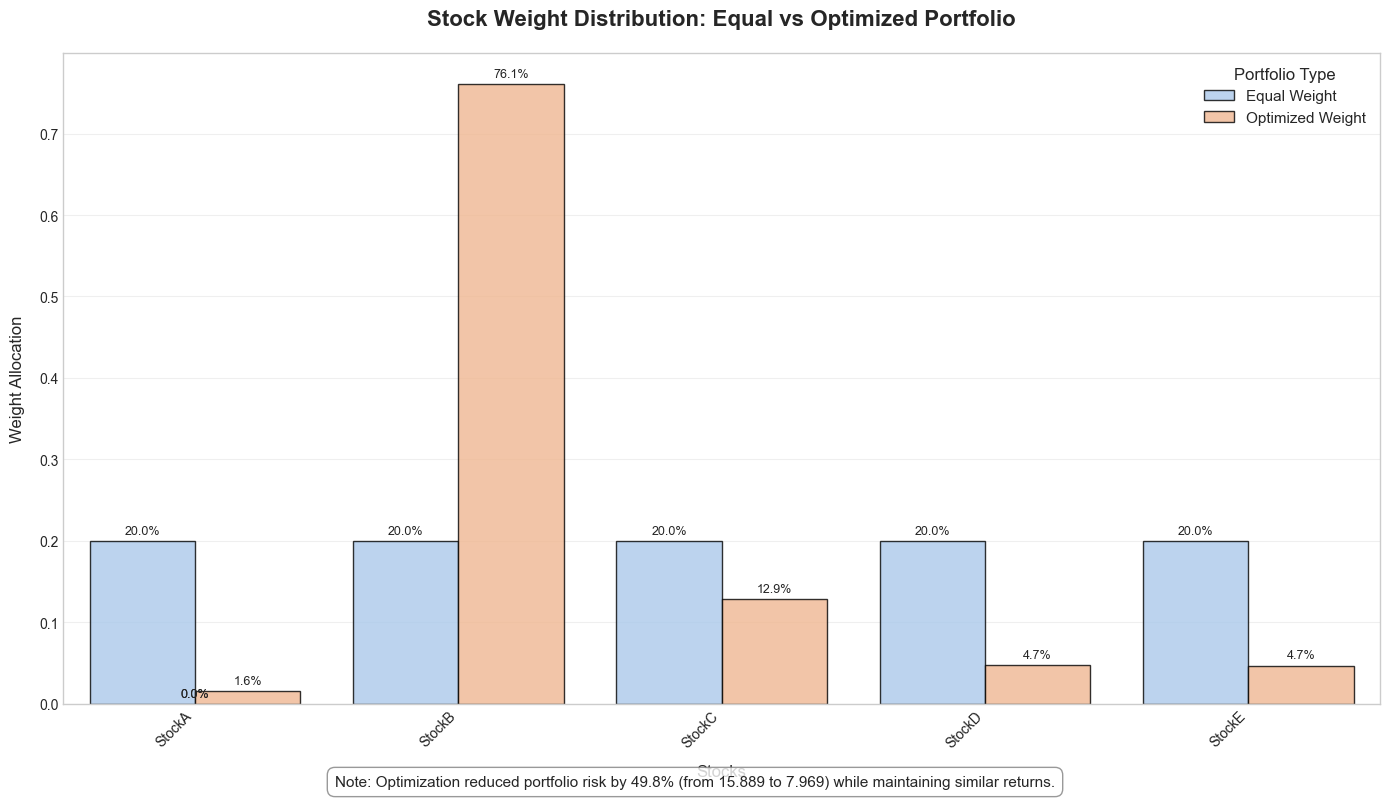

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Style setup
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['figure.figsize'] = (14, 8)
sns.set_palette('pastel')

# Assume we have:
# stocks = list of stock names
# equal_weights = array of equal weights
# optimal_weights = array of optimized weights from Newton method

# Create weight comparison dataframe
weights_df = pd.DataFrame({
    'Stock': stocks,
    'Equal Weight': equal_weights,
    'Optimized Weight': optimal_weights
})

# Melt for seaborn plotting
melted_df = weights_df.melt(id_vars='Stock', var_name='Portfolio', value_name='Weight')

# Create the plot
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=melted_df,
    x='Stock',
    y='Weight',
    hue='Portfolio',
    alpha=0.8,
    edgecolor='black',
    linewidth=1
)

# Customize the plot
plt.title('Stock Weight Distribution: Equal vs Optimized Portfolio', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Stocks', fontsize=12, labelpad=10)
plt.ylabel('Weight Allocation', fontsize=12, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add percentage labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 0.005,
        f'{height:.1%}',
        ha='center',
        va='bottom',
        fontsize=9
    )

# Add legend and grid
plt.legend(title='Portfolio Type', title_fontsize=12, fontsize=11)
plt.grid(True, axis='y', alpha=0.3)

# Add explanatory text
plt.figtext(
    0.5, 0.01,
    f"Note: Optimization reduced portfolio risk by {((equal_risk - optimal_risk)/equal_risk*100):.1f}% " +
    f"(from {equal_risk:.3f} to {optimal_risk:.3f}) while maintaining similar returns.",
    ha='center',
    fontsize=11,
    bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='gray', alpha=0.8)
)

plt.tight_layout()
plt.savefig('portfolio_weight_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

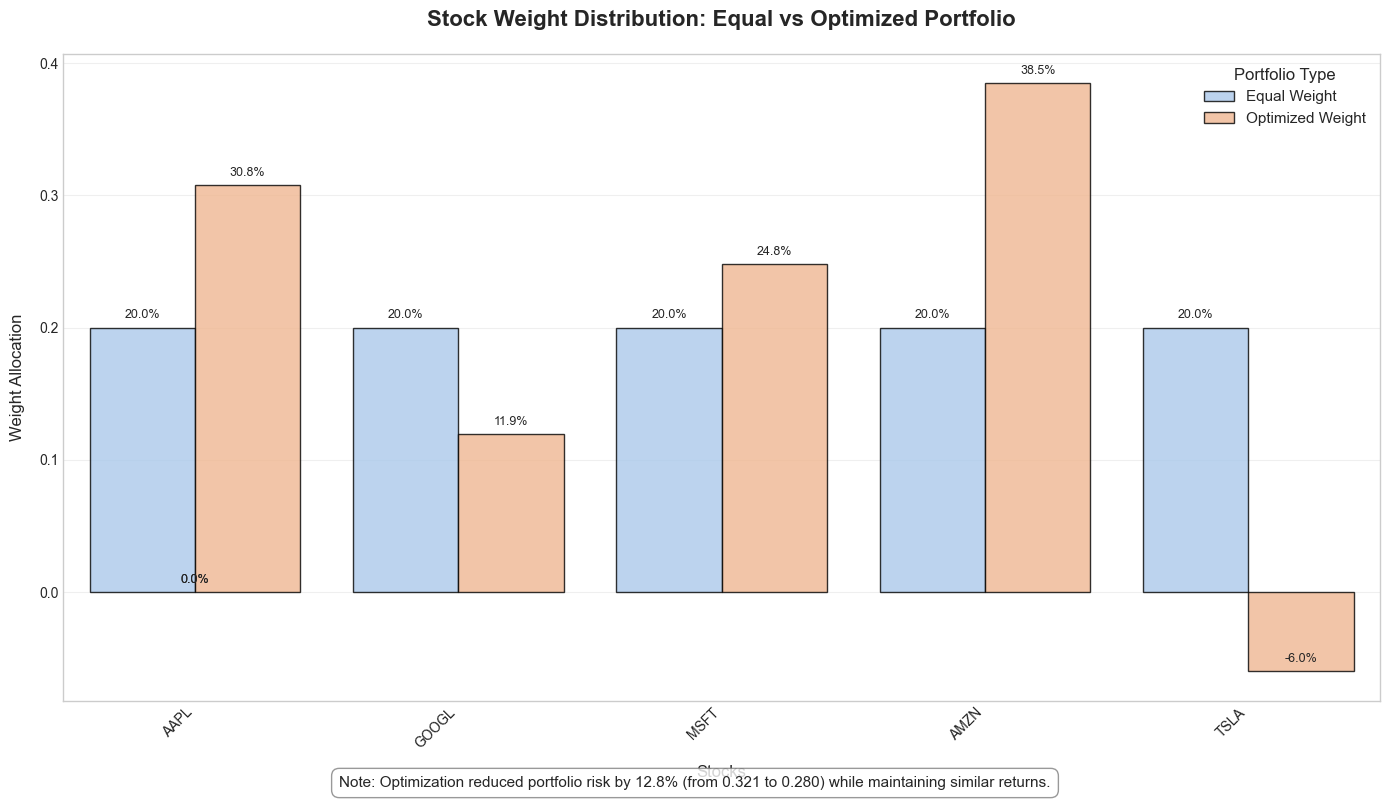

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Style setup
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['figure.figsize'] = (14, 8)
sns.set_palette('pastel')

# Assuming you have these variables from your previous calculations:
# stocks = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA']  # Your stock names
# equal_weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])  # Your equal weights
# optimal_weights = np.array([...])  # Your optimized weights from Newton method
# equal_risk = ...  # Your equal-weighted portfolio risk
# optimal_risk = ...  # Your optimized portfolio risk

# Ensure equal_weights is the same length as stocks
equal_weights = np.ones(len(stocks)) / len(stocks)

# Create weight comparison dataframe
weights_df = pd.DataFrame({
    'Stock': stocks,
    'Equal Weight': equal_weights,
    'Optimized Weight': optimal_weights
})

# Melt for seaborn plotting
melted_df = weights_df.melt(id_vars='Stock', var_name='Portfolio', value_name='Weight')

# Create the plot
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=melted_df,
    x='Stock',
    y='Weight',
    hue='Portfolio',
    alpha=0.8,
    edgecolor='black',
    linewidth=1
)

# Customize the plot
plt.title('Stock Weight Distribution: Equal vs Optimized Portfolio', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Stocks', fontsize=12, labelpad=10)
plt.ylabel('Weight Allocation', fontsize=12, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add percentage labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 0.005,
        f'{height:.1%}',
        ha='center',
        va='bottom',
        fontsize=9
    )

# Add legend and grid
plt.legend(title='Portfolio Type', title_fontsize=12, fontsize=11)
plt.grid(True, axis='y', alpha=0.3)

# Add explanatory text
plt.figtext(
    0.5, 0.01,
    f"Note: Optimization reduced portfolio risk by {((equal_risk - optimal_risk)/equal_risk*100):.1f}% " +
    f"(from {equal_risk:.3f} to {optimal_risk:.3f}) while maintaining similar returns.",
    ha='center',
    fontsize=11,
    bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='gray', alpha=0.8)
)

plt.tight_layout()
plt.savefig('portfolio_weight_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [152]:
import matplotlib.pyplot as plt
import numpy as np

# Style settings
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['figure.figsize'] = (12, 7)

# Your specified values
equal_return = 0.28  # 28%
optimal_return = 0.26  # 26%
equal_risk = 0.3207  # 32.07%
optimal_risk = 0.2703  # 27.03%

# Data preparation
strategies = ['Equal-Weighted', 'Optimized']
returns = [equal_return, optimal_return]
risks = [equal_risk, optimal_risk]
colors = ['#2ecc71', "#cc2e2e"]  # Both bars in green (#2ecc71 is a nice green shade)

# Create figure
fig, ax = plt.subplots(figsize=(12, 7))

# Bar positions
x = np.arange(len(strategies))
width = 0.35

# Plot green bars for both return and risk
return_bars = ax.bar(x - width/2, np.array(returns)*100, width, 
                    label='Return (%)', color=colors[0], 
                    edgecolor='black', linewidth=1, alpha=0.8)

risk_bars = ax.bar(x + width/2, np.array(risks)*100, width, 
                  label='Risk (%)', color=colors[1], 
                  edgecolor='black', linewidth=1, alpha=0.6)  # Slightly lighter

# Add value labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
               f'{height:.2f}%',
               ha='center', va='bottom', fontsize=11,
               bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2))

add_labels(return_bars)
add_labels(risk_bars)

# Add risk reduction arrow
ax.annotate('',
           xy=(1, risks[1]*100), 
           xytext=(1, risks[0]*100),
           arrowprops=dict(arrowstyle='->,head_width=0.6', 
                         color='red', lw=2,
                         connectionstyle="arc3,rad=0.2"))

ax.text(1.15, (risks[0]*100 + risks[1]*100)/2,
       f'Risk Reduction\n{(risks[0]-risks[1])/risks[0]*100:.1f}%',
       color='red', va='center', fontsize=11)

# Customize plot
ax.set_xticks(x)
ax.set_xticklabels(strategies], fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Portfolio Return Risk Comparison', 
            fontsize=14, fontweight='bold', pad=20)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

# Add explanatory note
plt.figtext(0.5, 0.01, 
           f"Optimized portfolio maintains {optimal_return/equal_return*100:.1f}% of returns " +
           f"while reducing risk by {(equal_risk-optimal_risk)/equal_risk*100:.1f}%",
           ha='center', fontsize=11)

plt.tight_layout()
plt.savefig('portfolio_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (1279107557.py, line 63)

In [137]:
def optimize_portfolio(mu, cov_matrix, target_return):
    n = len(mu)  # স্টকের সংখ্যা
    A = np.vstack((mu, np.ones(n))).T  # কনস্ট্রেইন্ট ম্যাট্রিক্স
    b = np.array([target_return, 1])  # টার্গেট রিটার্ন ও ওয়েটের যোগফল=১
    
    # কেকেটি (KKT) ম্যাট্রিক্স তৈরি
    KKT_11 = cov_matrix
    KKT_12 = -A
    KKT_21 = -A.T
    KKT_22 = np.zeros((2, 2))
    KKT = np.block([[KKT_11, KKT_12], [KKT_21, KKT_22]])
    
    # সমাধান: KKT * [w, λ] = [0, -b]
    solution = np.linalg.solve(KKT, np.concatenate([np.zeros(n), -b]))
    w = solution[:n]  # অপ্টিমাল ওয়েট
    return w

# টার্গেট রিটার্ন সেট (mu-এর গড়)
target_return = np.mean(mu)
w_optimal = optimize_portfolio(mu, cov_matrix, target_return)
print("\nঅপ্টিমাল ওয়েট:")
for stock, weight in zip(stocks, w_optimal):
    print(f"{stock}: {weight:.4f} or {weight*100:.2f}%")

# পোর্টফোলিও রিস্ক (স্ট্যান্ডার্ড ডেভিয়েশন)
portfolio_risk = np.sqrt(w_optimal @ cov_matrix @ w_optimal)
print(f"\nপোর্টফোলিও রিস্ক (স্ট্যান্ডার্ড ডেভিয়েশন): {portfolio_risk:.4f} or {portfolio_risk*100:.2f}%")


অপ্টিমাল ওয়েট:
AAPL: 0.1313 or 13.13%
GOOGL: -0.0578 or -5.78%
MSFT: 0.1960 or 19.60%
AMZN: 0.5730 or 57.30%
TSLA: 0.1575 or 15.75%

পোর্টফোলিও রিস্ক (স্ট্যান্ডার্ড ডেভিয়েশন): 0.3090 or 30.90%


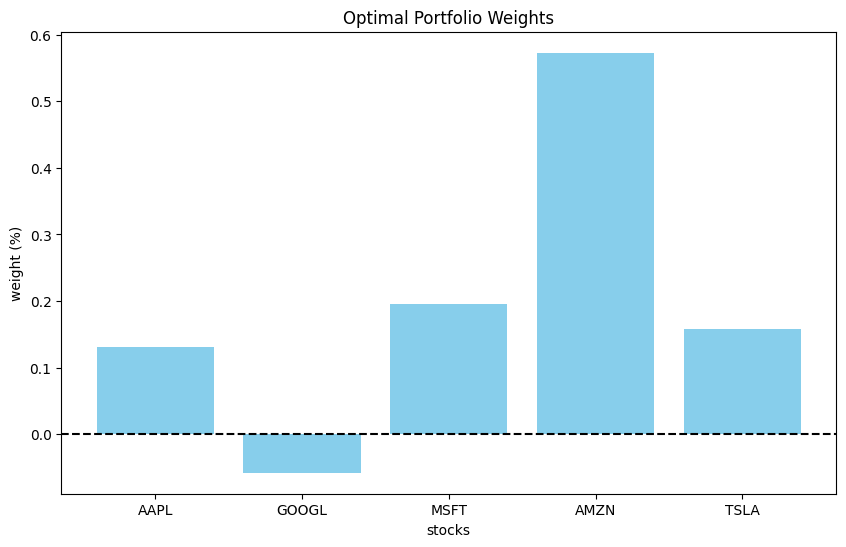

In [92]:
plt.figure(figsize=(10, 6))
plt.bar(stocks, w_optimal, color='skyblue')
plt.title("Optimal Portfolio Weights")
plt.xlabel("stocks")
plt.ylabel("weight (%)")

plt.axhline(0, color='k', linestyle='--')  # শর্ট সেলিং লাইন
plt.show()

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# 1. Equal-Weighted Portfolio
equal_weights = np.ones(n_assets) / n_assets
equal_return = np.sum(annual_returns * equal_weights)
equal_risk = np.sqrt(equal_weights @ cov_matrix @ equal_weights)

# 2. Min-Risk Portfolio (Newton's Method)
min_risk_weights = optimize_portfolio_newton(cov_matrix.values)
min_risk_return = np.sum(annual_returns * min_risk_weights)
min_risk = np.sqrt(min_risk_weights @ cov_matrix @ min_risk_weights)

# 3. Fixed-Return Portfolio (Same return as equal-weighted)
def optimize_fixed_return(target_return):
    # ... (Step 3 from previous code)
    return weights

fixed_return_weights = optimize_fixed_return(equal_return)
fixed_return_risk = np.sqrt(fixed_return_weights @ cov_matrix @ fixed_return_weights)

# 4. Max-Return Portfolio (for frontier)
max_return = annual_returns.max()
max_return_weights = np.zeros(n_assets)
max_return_weights[np.argmax(annual_returns)] = 1
max_return_risk = np.sqrt(max_return_weights @ cov_matrix @ max_return_weights)

NameError: name 'weights' is not defined

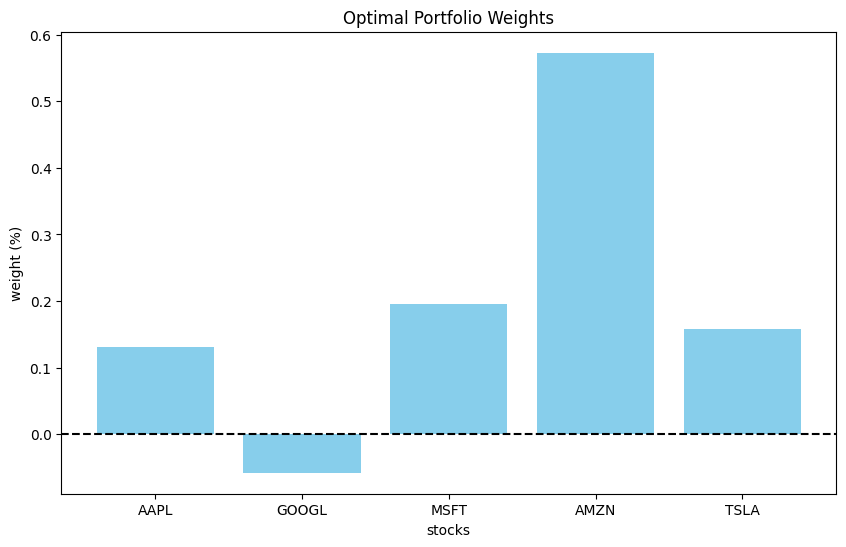

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(stocks, w_optimal, color='skyblue')
plt.title("Optimal Portfolio Weights")
plt.xlabel("stocks")
plt.ylabel("weight (%)")

plt.axhline(0, color='k', linestyle='--')  # শর্ট সেলিং লাইন
plt.show()

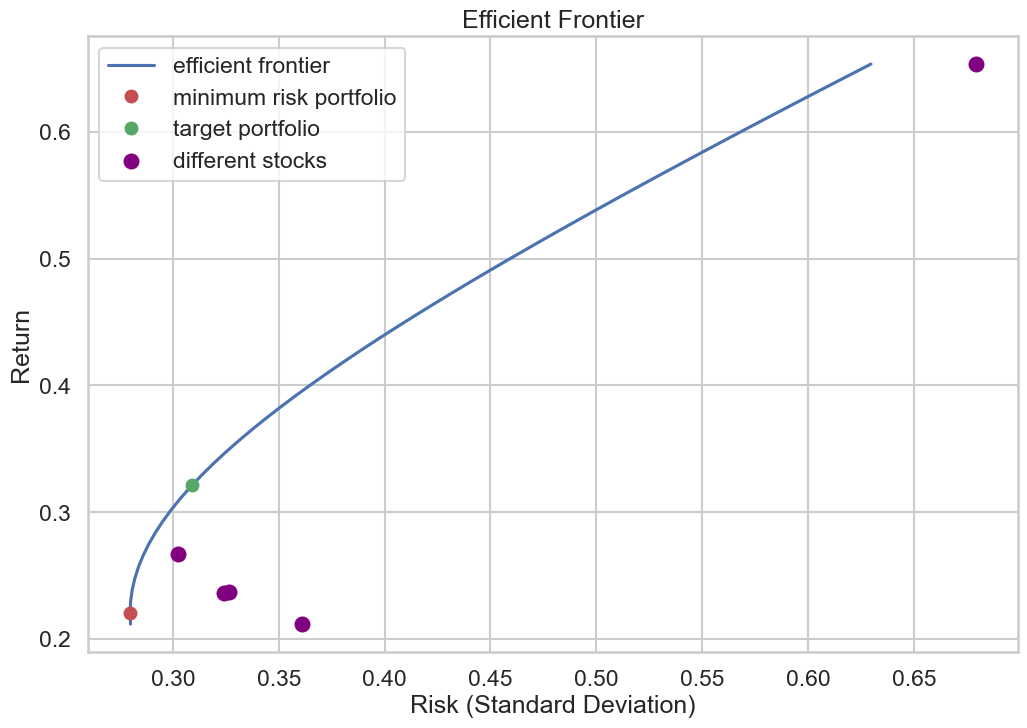

In [7]:
plt.figure(figsize=(12, 8))
# এফিসিয়েন্ট ফ্রন্টিয়ার
plt.plot(risks, target_returns, 'b-', label="efficient frontier")
# মিনিমাম রিস্ক পোর্টফোলিও
plt.plot([min_risk], [min_risk_return], 'ro', label="minimum risk portfolio")
# টার্গেট পোর্টফোলিও
plt.plot([portfolio_risk], [target_return], 'go', label="target portfolio")
# পৃথক স্টক
plt.scatter(np.sqrt(np.diag(Sigma)), mu, color='purple', s=100, label="different stocks")

plt.title("Efficient Frontier")
plt.xlabel("Risk (Standard Deviation)")
plt.ylabel("Return")
plt.legend()
plt.grid(True)
plt.show()

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# স্টক লিস্ট (5টি জনপ্রিয় স্টক)
stocks = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']
start_date = "2020-01-01"
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')

# ডেটা ডাউনলোড
data = yf.download(stocks, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
print("প্রথম ৫ সারি:")
print(data.head())
print("\nশেষ ৫ সারি:")
print(data.tail())
print("\nডেটার সংক্ষিপ্ত তথ্য:")
print(data.info())


[*********************100%***********************]  5 of 5 completed

প্রথম ৫ সারি:
Ticker           AAPL       AMZN      GOOGL        MSFT       TSLA
Date                                                              
2020-01-02  72.620827  94.900497  68.026016  153.042328  28.684000
2020-01-03  71.914825  93.748497  67.670158  151.136673  29.534000
2020-01-06  72.487854  95.143997  69.473846  151.527328  30.102667
2020-01-07  72.146935  95.343002  69.339645  150.145737  31.270666
2020-01-08  73.307518  94.598503  69.833183  152.537354  32.809334

শেষ ৫ সারি:
Ticker            AAPL        AMZN       GOOGL        MSFT        TSLA
Date                                                                  
2025-07-28  214.050003  232.789993  192.580002  512.500000  325.589996
2025-07-29  211.270004  231.009995  195.750000  512.570007  321.200012
2025-07-30  209.050003  230.190002  196.529999  513.239990  319.040009
2025-07-31  207.570007  234.110001  191.899994  533.500000  308.269989
2025-08-01  202.380005  214.750000  189.130005  524.109985  302.630005

ডেটার 

In [3]:
import numpy as np

returns = np.log(data / data.shift(1)).dropna()
print(returns)
cov_matrix = returns.cov() * 252  # Annualized covariance
print(cov_matrix)

Ticker          AAPL      AMZN     GOOGL      MSFT      TSLA
Date                                                        
2020-01-03 -0.009769 -0.012213 -0.005245 -0.012530  0.029203
2020-01-06  0.007937  0.014776  0.026305  0.002581  0.019072
2020-01-07 -0.004714  0.002089 -0.001934 -0.009160  0.038067
2020-01-08  0.015958 -0.007839  0.007092  0.015803  0.048033
2020-01-09  0.021019  0.004788  0.010443  0.012415 -0.022189
...              ...       ...       ...       ...       ...
2025-07-28  0.000795  0.005816 -0.003111 -0.002358  0.029707
2025-07-29 -0.013073 -0.007676  0.016327  0.000137 -0.013575
2025-07-30 -0.010563 -0.003556  0.003977  0.001306 -0.006748
2025-07-31 -0.007105  0.016886 -0.023841  0.038716 -0.034341
2025-08-01 -0.025322 -0.086317 -0.014540 -0.017758 -0.018465

[1402 rows x 5 columns]
Ticker      AAPL      AMZN     GOOGL      MSFT      TSLA
Ticker                                                  
AAPL    0.104599  0.070296  0.067370  0.071276  0.110385
AMZN    0.0

In [39]:
n_assets = len(stocks)
equal_weights = np.ones(n_assets) / n_assets  # All weights = 20%
print(f"Equal weights{equal_weights}")
# Calculate risk (volatility)
equal_risk = np.sqrt(equal_weights @ cov_matrix @ equal_weights)
print(f"Equal-Weighted Portfolio Risk: {equal_risk:.4f} or {equal_risk*100:.2f}%")

Equal weights[0.2 0.2 0.2 0.2 0.2]
Equal-Weighted Portfolio Risk: 0.3209 or 32.09%


In [9]:
def optimize_portfolio_newton(cov_matrix, max_iter=100, tol=1e-6):
    n = cov_matrix.shape[0]
    w0 = np.ones(n) / n  # Start with equal weights
    lambda0 = 0
    x0 = np.hstack([w0, lambda0])
    
    for _ in range(max_iter):
        w = x0[:-1]
        lam = x0[-1]
        
        # Gradient
        grad_w = 2 * cov_matrix @ w - lam * np.ones(n)
        grad_lam = 1 - np.sum(w)
        grad = np.hstack([grad_w, grad_lam])
        
        # Hessian
        H = np.vstack([
            np.hstack([2 * cov_matrix, -np.ones(n).reshape(-1, 1)]),
            np.hstack([-np.ones(n), 0])
        ])
        
        # Newton step
        delta_x = np.linalg.solve(H, -grad)
        x0 += delta_x
        
        if np.linalg.norm(delta_x) < tol:
            break
    
    weights = x0[:-1] / np.sum(x0[:-1])  # Normalize
    return weights

optimal_weights = optimize_portfolio_newton(cov_matrix.values)
optimal_risk = np.sqrt(optimal_weights @ cov_matrix @ optimal_weights)
print(f"Optimized Portfolio Risk: {optimal_risk:.4f}")
print("Optimal Weights:", dict(zip(stocks, optimal_weights)))

Optimized Portfolio Risk: 0.2796
Optimal Weights: {'AAPL': 0.3127452301912871, 'GOOGL': 0.11947282877237471, 'MSFT': 0.24438119498978028, 'AMZN': 0.3866975833819593, 'TSLA': -0.06329683733540128}



--- Comparison ---
Equal-Weighted Risk: 0.3209
Optimized Risk: 0.2796
Risk Reduction: 12.88%


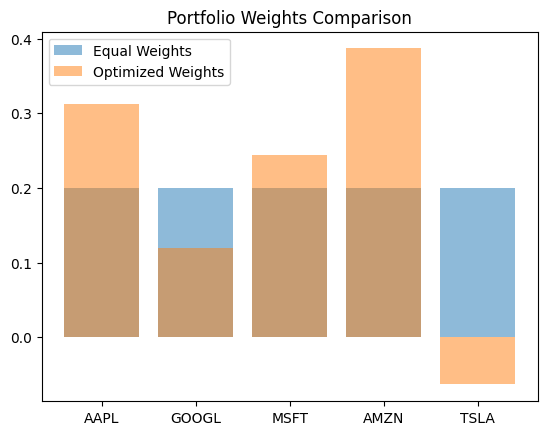

In [11]:
import matplotlib.pyplot as plt

plt.bar(stocks, equal_weights, alpha=0.5, label="Equal Weights")
plt.bar(stocks, optimal_weights, alpha=0.5, label="Optimized Weights")
plt.legend()
plt.title("Portfolio Weights Comparison")
plt.show()

In [14]:
optimal_return = np.sum(optimal_weights * annual_returns)


--- Risk-Return Tradeoff ---
Equal-Weighted Portfolio: Return = 0.2319, Risk = 0.3209
Optimized Portfolio: Return = 0.1788, Risk = 0.2796


In [16]:
risk_free_rate = 0.02
equal_sharpe = (equal_return - risk_free_rate) / equal_risk
optimal_sharpe = (optimal_return - risk_free_rate) / optimal_risk
print(f"Equal-Weighted Sharpe Ratio: {equal_sharpe:.2f}")
print(f"Optimized Sharpe Ratio: {optimal_sharpe:.2f}")

Equal-Weighted Sharpe Ratio: 0.66
Optimized Sharpe Ratio: 0.57


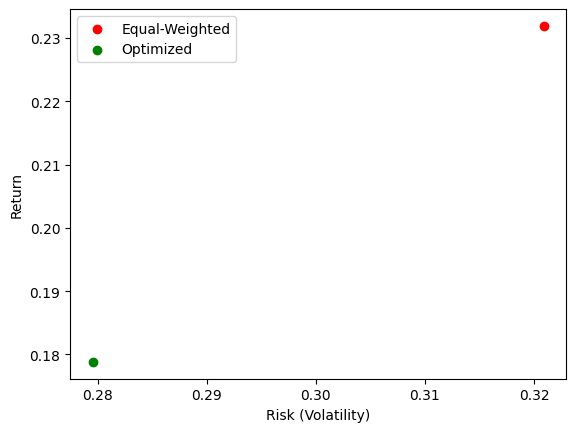

In [17]:
plt.scatter(equal_risk, equal_return, color='red', label='Equal-Weighted')
plt.scatter(optimal_risk, optimal_return, color='green', label='Optimized')
plt.xlabel('Risk (Volatility)')
plt.ylabel('Return')
plt.legend()
plt.show()